In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [122]:
data = pd.read_csv("heart.csv")

In [123]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [124]:
print(data.columns)
print(data.head())

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [125]:
# Features
X = data.drop('target', axis=1)
y = data['target'] 

In [126]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# Create log reg model
logreg_model = LogisticRegression(max_iter=5000)

In [128]:
# Train
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [129]:
# Test
y_pred = logreg_model.predict(X_test)

In [130]:
# Model Accuracy
acc1 = accuracy_score(y_test, y_pred)
print(f"Log Reg Accruacy: {acc1:.2f}")

Log Reg Accruacy: 0.89


In [131]:
# Create dec tree
dectree_model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

In [132]:
# Train
dectree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [133]:
# Test
y_pred = dectree_model.predict(X_test)

In [134]:
# Model Accuracy
acc2 = accuracy_score(y_test, y_pred)
print(f"Dec Tree Accuracy: {acc2:.2f}")

Dec Tree Accuracy: 0.80


In [135]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.95      0.66      0.78        32

    accuracy                           0.80        61
   macro avg       0.84      0.81      0.80        61
weighted avg       0.84      0.80      0.80        61



In [136]:
# Create model
nb_model = GaussianNB()

In [137]:
# Train
nb_model.fit(X_train, y_train)

GaussianNB()

In [138]:
# Test
y_pred = nb_model.predict(X_test)

In [139]:
# Model Accuracy
acc3 = accuracy_score(y_test, y_pred)
print(f"NB Accuracy: {acc3:.4f}")

NB Accuracy: 0.8689


In [140]:
# Test Prediction
patient_data = pd.DataFrame([
    [21, 0, 0, 125, 175, 0, 1, 167, 0, 0.35, 2, 0, 2],
    [72, 1, 3, 162, 350, 1, 1, 121, 1, 2.7, 0, 2, 1],
    [45, 1, 1, 140, 215, 0, 0, 140, 0, 1.3, 1, 1, 2]
], columns=X.columns)

In [141]:
# Log Reg Prediction
predict = logreg_model.predict(patient_data)
probability = logreg_model.predict_proba(patient_data)

In [142]:
print("Logistic Regression Model Prediction")
for i in range(3):
    prediction = predict[i]
    percent_risk = probability[i][1] * 100
    
    print(f"Patient {i+1}:")
    if prediction == 1:
        print("Has heart disease")
    else:
        print("No heart disease")
    print(f"  Risk: {percent_risk:.1f}%")
    print()

Logistic Regression Model Prediction
Patient 1:
Has heart disease
  Risk: 96.2%

Patient 2:
No heart disease
  Risk: 9.0%

Patient 3:
No heart disease
  Risk: 28.7%



In [143]:
# Dec Tree Prediction
predict = dectree_model.predict(patient_data)
probability = dectree_model.predict_proba(patient_data)

In [144]:
print("Decision Tree Model Prediction")
for i in range(3):
    prediction = predict[i]
    percent_risk = probability[i][1] * 100
    
    print(f"Patient {i+1}:")
    if prediction == 1:
        print("Has heart disease")
    else:
        print("No heart disease")
    print(f"  Risk: {percent_risk:.1f}%")
    print()

Decision Tree Model Prediction
Patient 1:
Has heart disease
  Risk: 95.0%

Patient 2:
No heart disease
  Risk: 0.0%

Patient 3:
Has heart disease
  Risk: 95.4%



In [145]:
# NB Prediction
predict = nb_model.predict(patient_data)
probability = nb_model.predict_proba(patient_data)

In [146]:
print("Naive Bayes Model Prediction")
for i in range(3):
    prediction = predict[i]
    percent_risk = probability[i][1] * 100
    
    print(f"Patient {i+1}:")
    if prediction == 1:
        print("Has heart disease")
    else:
        print("No heart disease")
    print(f"  Risk: {percent_risk:.1f}%")
    print()

Naive Bayes Model Prediction
Patient 1:
Has heart disease
  Risk: 100.0%

Patient 2:
No heart disease
  Risk: 0.0%

Patient 3:
Has heart disease
  Risk: 66.6%



In [147]:
# Logistic Regression ROC Curve Visualization
probabilities = logreg_model.predict_proba(X_test)[:, 1]

In [148]:
# ROC Curve - Test model at decision thresholds
false_pos, true_pos, thres = roc_curve(y_test, probabilities)
auc_score = auc(false_pos, true_pos)

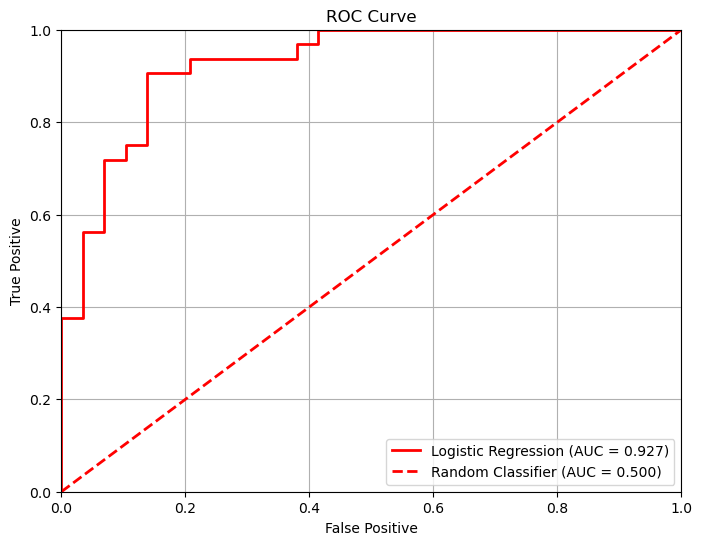

In [149]:
# Create visualization
plt.figure(figsize=(8, 6))
plt.plot(false_pos, true_pos, color='red', lw=2, label=f'Logistic Regression (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
